[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41]

['8:07', '15:37', '8:55', '16:25', '9:45', '17:14', '10:35', '18:00', '11:28', '18:46', '12:22', '19:31', '13:24', '20:16', '3:22', '21:01', '4:07', '21:46', '4:50', '11:58', '5:31', '12:56', '6:08', '13:45', '6:47', '14:25', '7:22', '15:00', '7:59', '15:34', '8:34', '16:08', '9:10', '16:41', '9:45', '17:12', '10:21', '17:45', '10:57', '18:15', '11:38', '18:48', '12:25', '19:20', '2:22', '19:52', '2:58', '20:30', '3:37', '10:44', '4:23', '11:55', '5:15', '12:57', '6:09', '13:50', '7:05', '14:39', '7:58', '15:27', '8:50', '16:10', '9:40', '16:52', '10:30', '17:34', '11:19', '18:12', '12:10', '18:49', '1:32', '19:24', '2:13', '20:00', '2:54', '9:54', '3:39', '11:15', '4:29', '12:22

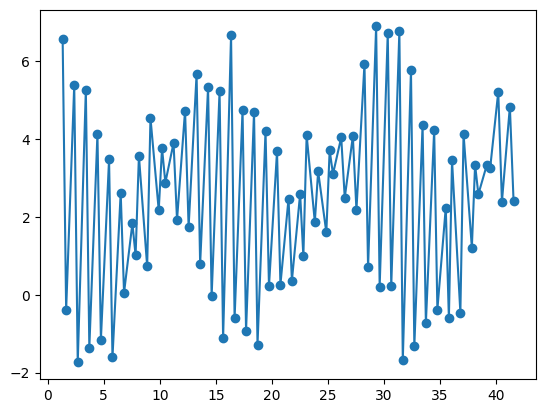

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("ASTR19_F24_group_project_data.txt",
                     dtype=[('myint','i8'),('mystring','S5'),('myfloat','f8')])

day = []
time = []
height = []

#print(data)
#print(data.shape)

for i in range(82):
    day.append(data[i][0])
    time.append(data[i][1].decode("utf-8"))
    height.append(data[i][2])
    
    
print(day)
print('')
print(time)
print('')
print(day)
print(height)

def convert_time(time_value):
    #separate time into hours and minutes
    hours, minutes = time_value.split(':')
    #turn them into a number
    hours = float(hours)
    minutes = float(minutes)
    #turn into hour decimal
    hours = hours+minutes/60
    #turn into days
    return hours/24

#make empty list for x axis
t = []
#loop data set
for i in range (len(time)):
    #convert time elements
    time_converted = convert_time(time[i])
    #add each converted time to that same day element. Add to xaxis list. 
    t.append(day[i]+time_converted)

print(t)

##graph data, putting points on relevant data
plt.plot(t, height, 'o-')

plt.savefig('time-height.png', bbox_inches="tight", facecolor='white')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.optimize
from scipy.optimize import curve_fit

In [4]:
a = np.loadtxt("ASTR19_F24_group_project_data.txt", dtype='str')
i=0

datetemp=[]
timetemp=[]
time=[]
height=[]
date=[]

for arr in a: 
    datetemp.append(int(arr[0]))
    timetemp.append(arr[1])
    height.append(float(arr[2]))

for elem in timetemp:
    splitelem=elem.split(':')
    abstime = (int(splitelem[0])*60+int(splitelem[1]))
    time.append(abstime)


for elem in time:
    date.append(float(datetemp[i]+elem/1440))
    i+=1


heighterr=0.25 #sets uncertainty error

[  3.37726647  -1.34746193  -6.28797548 -15.2722379    0.21249679
  10.28776202   3.19714624   7.69825426   9.97244486]
852406.5362417671


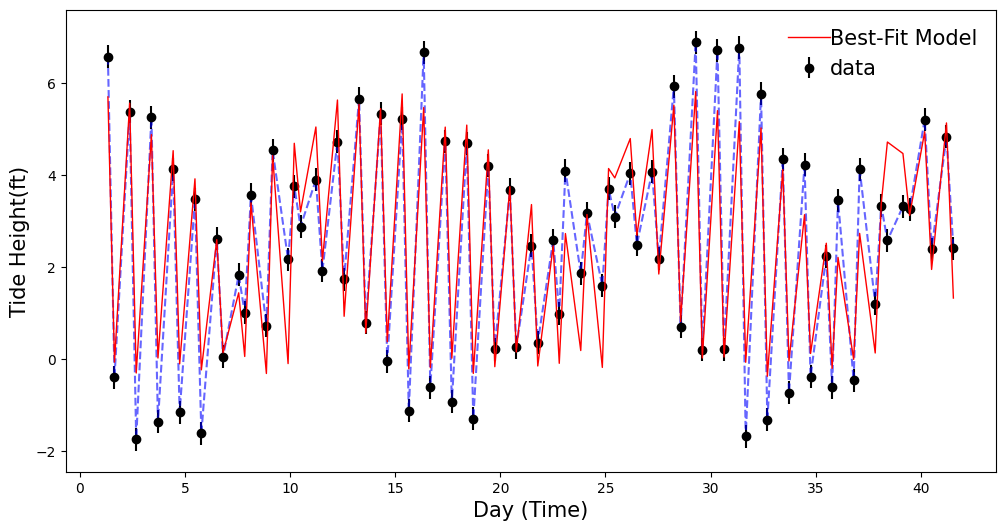

In [15]:
def fittedcurve(x,a,b,c,d,e,f,g,h,i):
    return a*np.sin(b*np.sin(c*x+d)+i) + e*np.sin(f*x+h)+g #Best fit I have found so far

date=np.array(date)
height=np.array(height)

params,cov = curve_fit(fittedcurve,date,height,maxfev=2170000000,p0=[9.00001,-2,10,10,10,10,10,10,10],method='trf',bounds=(-100,400)) 
print(params)
fit = fittedcurve(date,*params)

fitstd=np.std(fit)
print(np.linalg.cond(cov))
np.diag(cov)


ig = plt.figure(figsize=(12,6),linewidth=1)

fit = fittedcurve(date,*params)


plt.errorbar(date,height,yerr=heighterr,color='black',alpha=1,fmt='o',label='data')
plt.plot(date,fit,color='red',zorder=3,linewidth=1, label='Best-Fit Model')
plt.plot(date,height,color='blue',linestyle='dashed',alpha=0.6)
plt.xlabel('Day (Time)', fontsize =15)
plt.ylabel('Tide Height(ft)', fontsize =15)
plt.legend(frameon=False,fontsize=15, handletextpad=0)

plt.savefig("astr19_group_proj.pdf", bbox_inches="tight",facecolor="white")

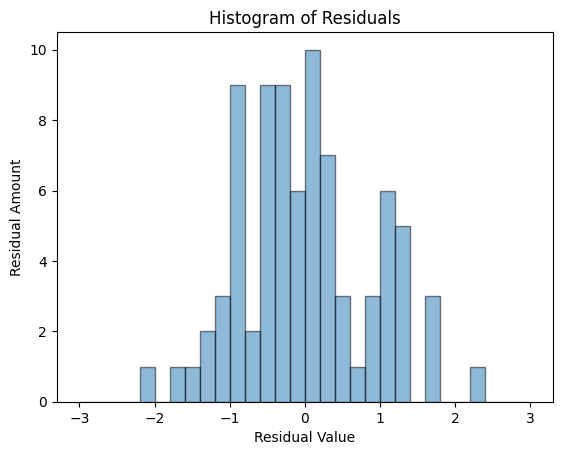

Standard deviation of residuals: 0.8678509182315801


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


#find residuals 
residuals = height - fit

n = 82
x = residuals 

width = 0.2
histmin = np.floor(min(x))
histmax = np.ceil(max(x))+width

bins = np.arange(histmin,histmax,width)
plt.hist(x,bins=bins,alpha=0.5,edgecolor="black")
plt.xlabel('Residual Value')
plt.ylabel('Residual Amount')
plt.title('Histogram of Residuals')
plt.savefig("groupproj1.png",bbox_inches="tight",facecolor="white")
plt.show()

#standard deviation
print(f"Standard deviation of residuals: {np.std(residuals)}") 


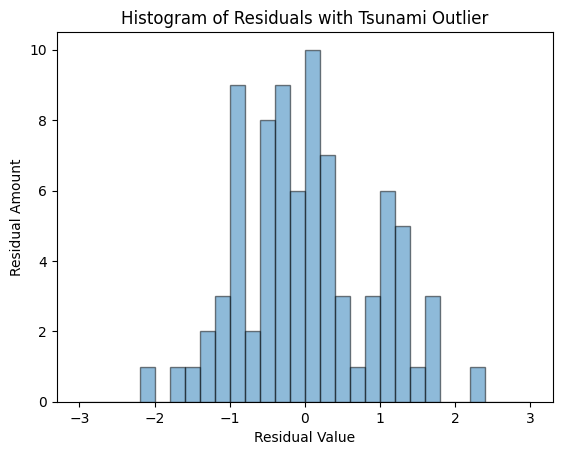

Standard deviation of residuals with tsunami: 0.8804510654414336
The tsunami caused a deviation of 2.27 standard deviations.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.genfromtxt("ASTR19_F24_group_project_data.txt",
                     dtype=[('myint', 'i8'), ('mystring', 'S5'), ('myfloat', 'f8')])

day = []
time = []
height = []

for i in range(82):
    day.append(data[i][0])
    time.append(data[i][1].decode("utf-8"))
    height.append(data[i][2])

#converttime
def convert_time(time_value):
    hours, minutes = time_value.split(':')
    hours = float(hours)
    minutes = float(minutes)
    return hours + minutes / 60

t = []
for i in range(len(time)):
    time_converted = convert_time(time[i])
    t.append(day[i] + time_converted / 24)

#curve fitting yay!
t = np.array(t)

def fittedcurve(x,a,b,c,d,e,f,g,h,i):
    return a*np.sin(b*np.sin(c*x+d)+i) + e*np.sin(f*x+h)+g #Best fit I have found so far

#fit model to data
params, cov = curve_fit(fittedcurve, t, height, maxfev=2170000000,
                        p0=[9.00001, -2, 10, 10, 10, 10, 10, 10, 10], method='trf', bounds=(-100, 400))

fit = fittedcurve(t, *params)

residuals = np.array(height) - fit


# Tsunami deviation is 2 feet at the first high tide - January 14
tsunami_index = 28  # January 14 index
tsunami_deviation = 2  #increased the tide by 2 feet

# copy residuals and add outlier
residuals_with_tsunami = residuals.copy()
residuals_with_tsunami[tsunami_index] += tsunami_deviation

# Plotting the histogram 
width = 0.2
histmin = np.floor(min(residuals_with_tsunami))
histmax = np.ceil(max(residuals_with_tsunami)) + width
bins = np.arange(histmin, histmax, width)

plt.hist(residuals_with_tsunami, bins=bins, alpha=0.5, edgecolor="black")
plt.xlabel('Residual Value')
plt.ylabel('Residual Amount')
plt.title('Histogram of Residuals with Tsunami Outlier')

#save it
plt.savefig("groupproj_with_tsunami.png", bbox_inches="tight", facecolor="white")
plt.show()

#calculate standard deviation

std_residuals_with_tsunami = np.std(residuals_with_tsunami)

#how many standard deviations
num_std_deviations = tsunami_deviation / std_residuals_with_tsunami

#Print!!!!!
print(f"Standard deviation of residuals with tsunami: {std_residuals_with_tsunami}")
print(f"The tsunami caused a deviation of {num_std_deviations:.2f} standard deviations.")
